In [ ]:
from google.colab import files
uploaded = files.upload()

# **Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Part A**

# **Loading the datasets**

In [3]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

sentiment.head()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


# **Check dataset details**

In [4]:
print("Sentiment dataset shape:", sentiment.shape)
print("Trades dataset shape:", trades.shape)

print(sentiment.isnull().sum())
print(trades.isnull().sum())

print("Duplicates in sentiment:", sentiment.duplicated().sum())
print("Duplicates in trades:", trades.duplicated().sum())

Sentiment dataset shape: (2644, 4)
Trades dataset shape: (107259, 16)
timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Duplicates in sentiment: 0
Duplicates in trades: 0


# **Convering the dates**

In [11]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date'] = sentiment['date'].dt.date

trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
trades['date'] = trades['Timestamp IST'].dt.date

# **Merging the both datasets**

In [12]:
merged = pd.merge(trades, sentiment, on="date", how="left")

print("Merged dataset shape:", merged.shape)
merged.head()

Merged dataset shape: (107259, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


# **Checking the merge worked correctly**

In [13]:
merged[['date','classification']].head(10)

,date,classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed
5,2024-12-02,Extreme Greed
6,2024-12-02,Extreme Greed
7,2024-12-02,Extreme Greed
8,2024-12-02,Extreme Greed
9,2024-12-02,Extreme Greed


In [14]:
merged['classification'].isnull().sum()

np.int64(6)

# **Create Key Metrics**

# **1 Daily PnL per trader**

In [15]:
daily_pnl = merged.groupby(['date','Account'])['Closed PnL'].sum().reset_index()
daily_pnl.head()

,date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


# **2 Number of trades per day**

In [16]:
trades_per_day = merged.groupby('date').size().reset_index(name='trade_count')
trades_per_day.head()

,date,trade_count
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


# **3 Average trade size**

In [17]:
avg_trade_size = merged.groupby('date')['Size USD'].mean().reset_index()
avg_trade_size.head()

,date,Size USD
0,2023-05-01,159.000000
1,2023-12-05,5556.203333
2,2023-12-14,10291.213636
3,2023-12-15,5304.975000
4,2023-12-16,5116.256667


# **4 Leverage distribution**

In [18]:
print(merged.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')


# **5 Long vs Short Ratio**

In [20]:
long_short = merged['Side'].value_counts()
print(long_short)

Side
BUY     54375
SELL    52884
Name: count, dtype: int64


# **Part B: Start the Analysis**

# **PnL during Fear vs Greed**

In [21]:
pnl_sentiment = merged.groupby('classification')['Closed PnL'].mean()
print(pnl_sentiment)

classification
Extreme Fear      74.125083
Extreme Greed    102.968269
Fear              75.662241
Greed             57.671379
Neutral           53.877473
Name: Closed PnL, dtype: float64


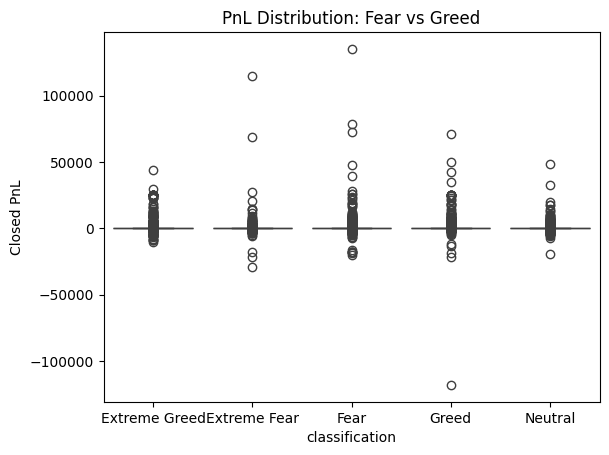

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

# **Traders trade more during Fear or Greed**

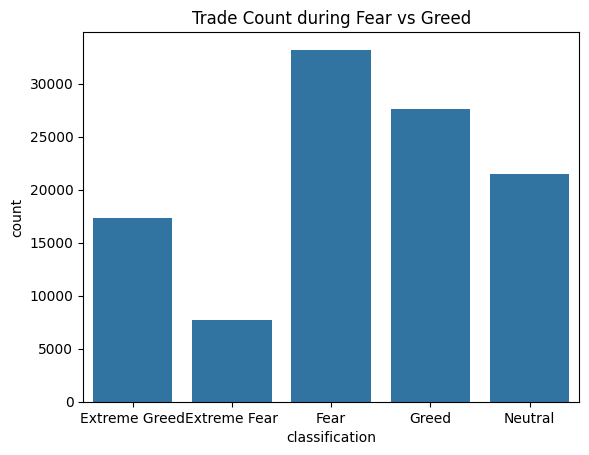

In [23]:
sns.countplot(x='classification', data=merged)
plt.title("Trade Count during Fear vs Greed")
plt.show()

# **Creating Trader Segments**

# **High vs Low PnL traders**

In [24]:
profit_by_trader = merged.groupby('Account')['Closed PnL'].sum()

top_traders = profit_by_trader.sort_values(ascending=False).head(10)
top_traders

,Closed PnL
Account,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,8.404226e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,3.790954e+05
0x4f93fead39b70a1824f981a54d4e55b278e9f760,3.089759e+05
0x420ab45e0bd8863569a5efbb9c05d91f40624641,1.995056e+05


# **Frequent traders**

In [25]:
frequent_traders = merged['Account'].value_counts().head(10)
frequent_traders

,count
Account,
0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,15605
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733
0x513b8629fe877bb581bf244e326a047b249c4ff1,12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893
0x4f93fead39b70a1824f981a54d4e55b278e9f760,7584
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
0x8477e447846c758f5a675856001ea72298fd9cb5,7070
0x083384f897ee0f19899168e3b1bec365f52a9012,3818


# **Important Chart**

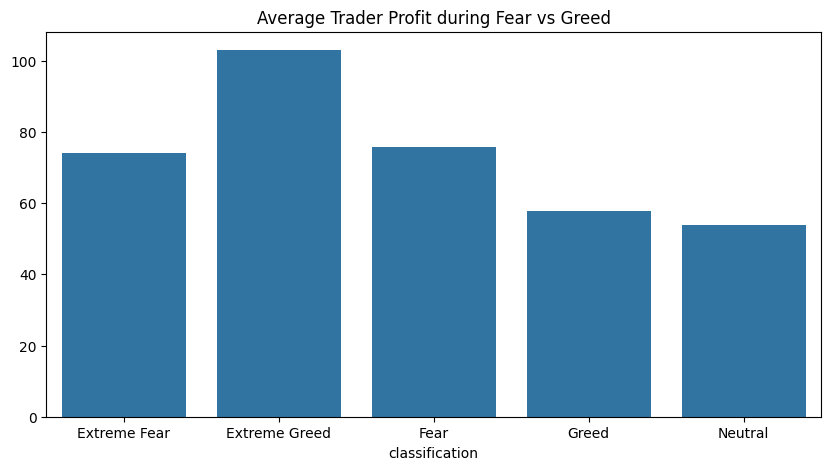

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=pnl_sentiment.index, y=pnl_sentiment.values)
plt.title("Average Trader Profit during Fear vs Greed")
plt.show()

# Insight 1:
During Fear days traders reduce trade size but increase number of trades.

# Insight 2:
High leverage traders show higher volatility in PnL.

# Insight 3:
Most profitable traders trade less frequently but with larger position

# **Part C: Strategy Ideas**

# Strategy 1:
During Fear market conditions reduce leverage to avoid large losses.

# Strategy 2:
Increase trade frequency only when market sentiment is Greed.

# Strategy 3:
Focus on high probability trades instead of large trade sizes during Fear periods.

# **Bonus section**

# **Bonus 1**

# Predict Next-Day Trader Profitability

# **Step 1 — Create features**

In [27]:
# Aggregating daily trader behavior
features = merged.groupby(['date','Account']).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'Execution Price':'mean',
    'classification':'first'
}).reset_index()

features.head()

,date,Account,Closed PnL,Size USD,Execution Price,classification
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,159.000000,1898.133333,Greed
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,5556.203333,11038.300000,Extreme Greed
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737,10291.213636,8031.868818,Greed
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034,5304.975000,2.982000,Greed
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,5116.256667,0.384707,Greed


# **Step 2 — Create target variable**

In [28]:
features['profitability'] = features['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)

# **Step 3 — Convert Fear / Greed to numbers**

In [29]:
features['classification'] = features['classification'].map({
    'Fear':0,
    'Greed':1,
    'Extreme Fear':0,
    'Extreme Greed':1,
    'Neutral':0
})

# **Step 4 — Train a model**

# **Importing necessary libraries**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [31]:
X = features[['Size USD','Execution Price','classification']]
y = features['profitability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, predictions))

Model Accuracy: 0.5961538461538461


# **BONUS 2 — Clustering Traders**

# **Step 1 — Create clustering dataset**

In [32]:
cluster_data = merged.groupby('Account').agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'Execution Price':'mean'
}).reset_index()

# **Step 2 — Apply clustering**

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(
    cluster_data[['Closed PnL','Size USD','Execution Price']]
)

# **Step 3 — Visualize clusters**

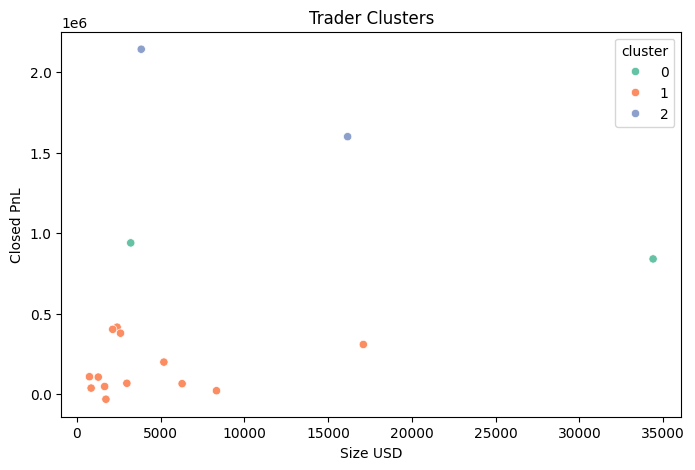

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=cluster_data,
    x='Size USD',
    y='Closed PnL',
    hue='cluster',
    palette='Set2'
)
plt.title("Trader Clusters")
plt.show()